In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
automobile = fetch_ucirepo(id=10) 
  
# data (as pandas dataframes) 
X = automobile.data.features 
y = automobile.data.targets 
  
# metadata 
print(automobile.metadata) 
  
# variable information 
print(automobile.variables) 


{'uci_id': 10, 'name': 'Automobile', 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile', 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv', 'abstract': "From 1985 Ward's Automotive Yearbook", 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 205, 'num_features': 25, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['symboling'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1985, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5B01C', 'creators': ['Jeffrey Schlimmer'], 'intro_paper': None, 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which th

In [6]:
# Convert the features (x_data) and target (y_data) arrays into DataFrames
#X = pd.DataFrame(X, columns=automobile.feature_names)
#y = pd.DataFrame(y)

# Concatenate them horizontally to create a single DataFrame
auto_df = pd.concat([X, y], axis=1)
auto_df.head(11)

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2
5,15250.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,99.8,front,fwd,sedan,2.0,std,gas,audi,NaN,2
6,17710.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,105.8,front,fwd,sedan,4.0,std,gas,audi,158.0,1
7,18920.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,105.8,front,fwd,wagon,4.0,std,gas,audi,NaN,1
8,23875.0,20,17,5500.0,140.0,8.3,3.40,3.13,mpfi,131,...,105.8,front,fwd,sedan,4.0,turbo,gas,audi,158.0,1
9,NaN,22,16,5500.0,160.0,7.0,3.40,3.13,mpfi,131,...,99.5,front,4wd,hatchback,2.0,turbo,gas,audi,NaN,0


In [12]:
auto_df.to_csv("automobile.csv", index=False)

In [7]:
auto_df.isnull().sum()

price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
symboling             0
dtype: int64

In [8]:
auto_df.describe(include="all")

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
count,201.000000,205.000000,205.000000,203.000000,203.000000,205.000000,201.000000,201.000000,205,205.000000,...,205.000000,205,205,205,203.000000,205,205,205,164.000000,205.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,...,NaN,2,3,5,NaN,2,2,22,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mpfi,NaN,...,NaN,front,fwd,sedan,NaN,std,gas,toyota,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,NaN,...,NaN,202,120,96,NaN,168,185,32,NaN,NaN
mean,13207.129353,30.751220,25.219512,5125.369458,104.256158,10.142537,3.255423,3.329751,NaN,126.907317,...,98.756585,NaN,NaN,NaN,3.123153,NaN,NaN,NaN,122.000000,0.834146
std,7947.066342,6.886443,6.542142,479.334560,39.714369,3.972040,0.316717,0.273539,NaN,41.642693,...,6.021776,NaN,NaN,NaN,0.994841,NaN,NaN,NaN,35.442168,1.245307
min,5118.000000,16.000000,13.000000,4150.000000,48.000000,7.000000,2.070000,2.540000,NaN,61.000000,...,86.600000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,65.000000,-2.000000
25%,7775.000000,25.000000,19.000000,4800.000000,70.000000,8.600000,3.110000,3.150000,NaN,97.000000,...,94.500000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,94.000000,0.000000
50%,10295.000000,30.000000,24.000000,5200.000000,95.000000,9.000000,3.290000,3.310000,NaN,120.000000,...,97.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,115.000000,1.000000
75%,16500.000000,34.000000,30.000000,5500.000000,116.000000,9.400000,3.410000,3.590000,NaN,141.000000,...,102.400000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,150.000000,2.000000


In [15]:
for i in auto_df.columns:
    print({i:auto_df[i].unique()})

{'price': array([13495., 16500., 13950., 17450., 15250., 17710., 18920., 23875.,
          nan, 16430., 16925., 20970., 21105., 24565., 30760., 41315.,
       36880.,  5151.,  6295.,  6575.,  5572.,  6377.,  7957.,  6229.,
        6692.,  7609.,  8558.,  8921., 12964.,  6479.,  6855.,  5399.,
        6529.,  7129.,  7295.,  7895.,  9095.,  8845., 10295., 12945.,
       10345.,  6785., 11048., 32250., 35550., 36000.,  5195.,  6095.,
        6795.,  6695.,  7395., 10945., 11845., 13645., 15645.,  8495.,
       10595., 10245., 10795., 11245., 18280., 18344., 25552., 28248.,
       28176., 31600., 34184., 35056., 40960., 45400., 16503.,  5389.,
        6189.,  6669.,  7689.,  9959.,  8499., 12629., 14869., 14489.,
        6989.,  8189.,  9279.,  5499.,  7099.,  6649.,  6849.,  7349.,
        7299.,  7799.,  7499.,  7999.,  8249.,  8949.,  9549., 13499.,
       14399., 17199., 19699., 18399., 11900., 13200., 12440., 13860.,
       15580., 16900., 16695., 17075., 16630., 17950., 18150., 1276

In [17]:
for i in auto_df.columns:
    print({i:auto_df[i].value_counts()})

{'price': 8921.0     2
18150.0    2
8845.0     2
8495.0     2
7609.0     2
          ..
45400.0    1
16503.0    1
5389.0     1
6189.0     1
22625.0    1
Name: price, Length: 186, dtype: int64}
{'highway-mpg': 25    19
38    17
24    17
30    16
32    16
34    14
37    13
28    13
29    10
33     9
22     8
31     8
23     7
27     5
43     4
42     3
26     3
41     3
19     2
39     2
18     2
16     2
20     2
36     2
47     2
46     2
54     1
17     1
53     1
50     1
Name: highway-mpg, dtype: int64}
{'city-mpg': 31    28
19    27
24    22
27    14
17    13
26    12
23    12
21     8
25     8
30     8
38     7
28     7
16     6
37     6
22     4
29     3
15     3
20     3
18     3
14     2
34     1
35     1
32     1
36     1
45     1
13     1
49     1
47     1
33     1
Name: city-mpg, dtype: int64}
{'peak-rpm': 5500.0    37
4800.0    36
5000.0    27
5200.0    23
5400.0    13
6000.0     9
5800.0     7
5250.0     7
4500.0     7
4150.0     5
4200.0     5
4350.0     4
4750.0     4
51

                      price  peak-rpm  horsepower  compression-ratio  \
price              1.000000 -0.101649    0.810533           0.071107   
peak-rpm          -0.101649  1.000000    0.130971          -0.436221   
horsepower         0.810533  0.130971    1.000000          -0.205874   
compression-ratio  0.071107 -0.436221   -0.205874           1.000000   
stroke             0.082310 -0.071493    0.090254           0.186170   
bore               0.543436 -0.264269    0.577273           0.005203   
engine-size        0.872335 -0.244618    0.810773           0.028971   
num-of-cylinders   0.708645 -0.124434    0.691633          -0.020002   
curb-weight        0.834415 -0.266306    0.751034           0.151362   
height             0.135486 -0.322272   -0.110711           0.261214   
width              0.751265 -0.219957    0.642482           0.181129   
length             0.690628 -0.287325    0.555003           0.158414   
wheel-base         0.584642 -0.361052    0.352297           0.24

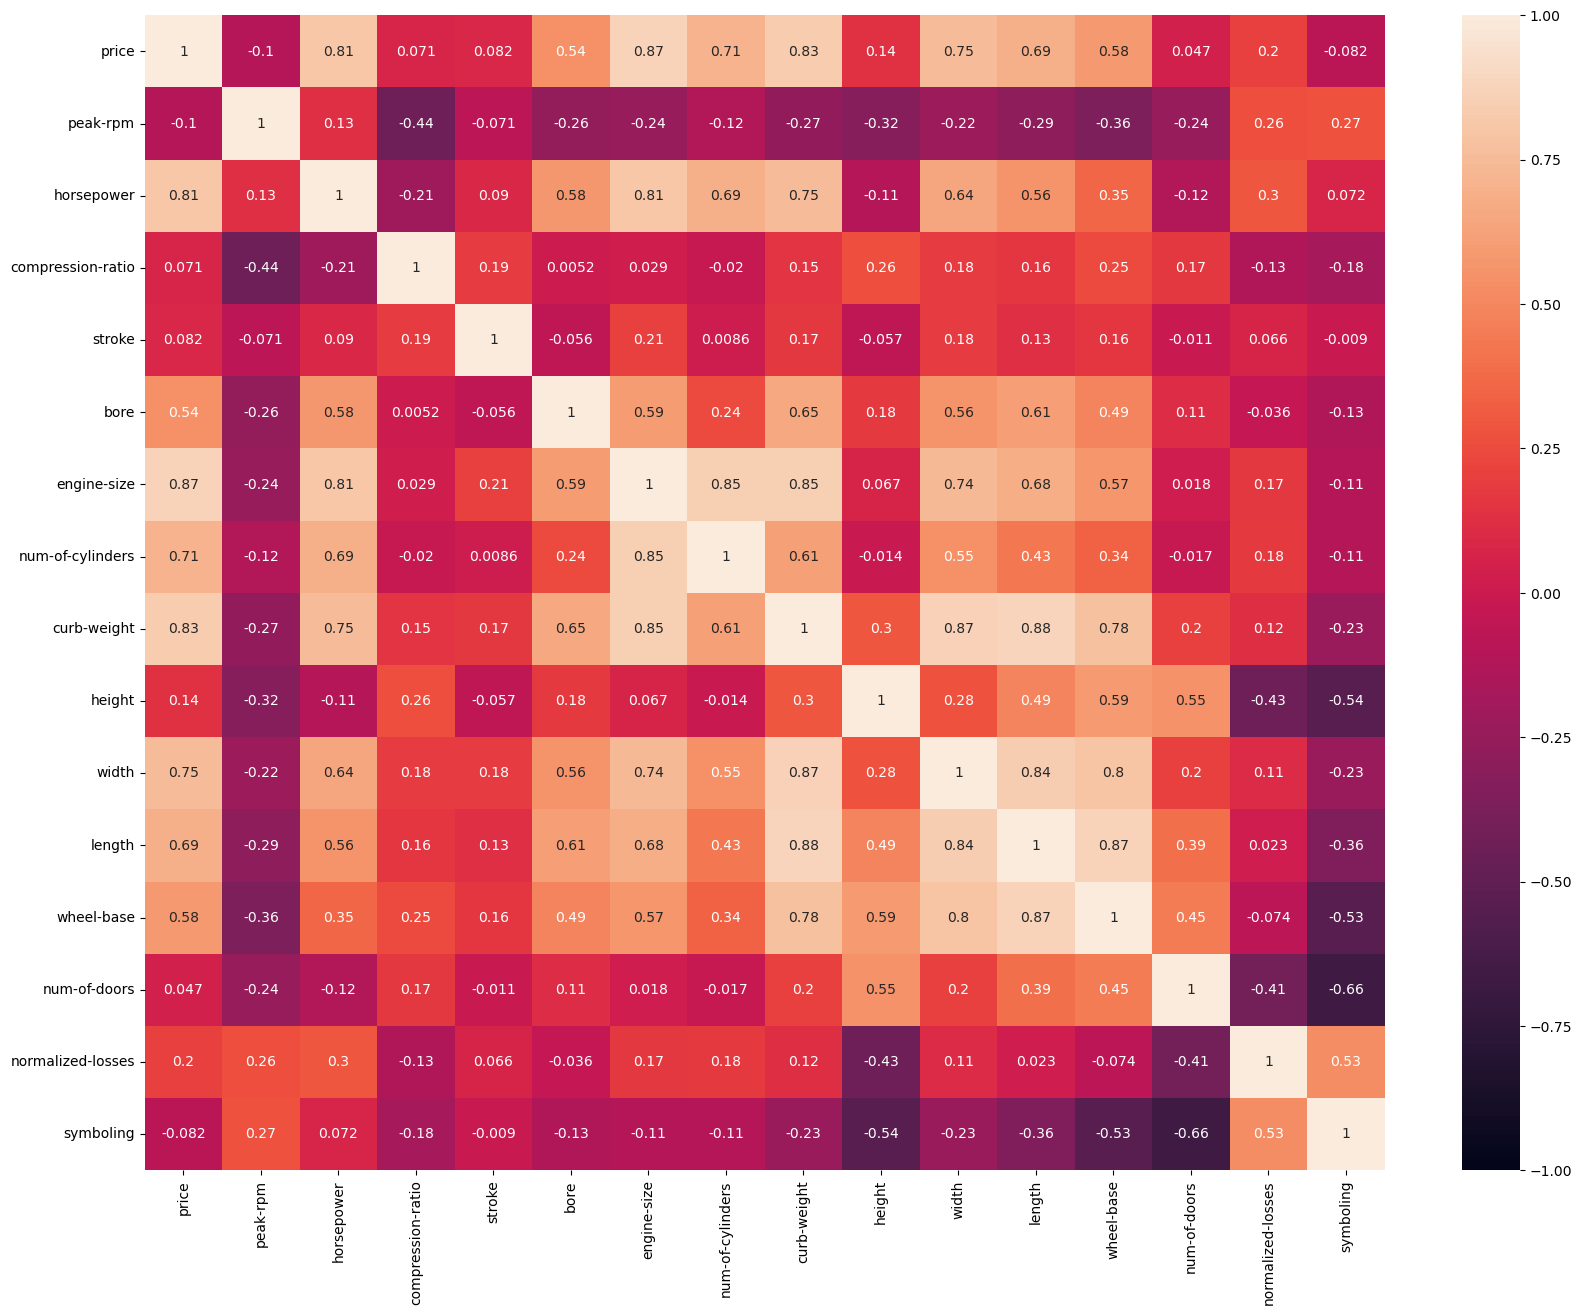

In [27]:
corr_df=auto_df.corr(method="pearson")
print(corr_df)
plt.figure(figsize=(20, 15))
sns.heatmap(corr_df,vmax=1.0, vmin=-1.0, annot=True)
plt.size=20
plt.show()

In [26]:
auto_df.drop(["highway-mpg"],axis=1,inplace=True)
auto_df.shape

(205, 24)